In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
lamarck = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Lamarck/Lamarck_budget.csv", header=0, index_col=[0,1])
print(lamarck)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Baldwin/Baldwin_budget.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0,1])
print(baldwin.shape)

df_together = pd.concat([lamarck,baldwin],axis=0,keys=["Lamarck","Baldwin"])
print(df_together.shape)

                   590        593        579        588        589        591  \
F1  Times1   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times2   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times3   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times4   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
    Times5   2000198.0  2000198.0  2000398.0  2000198.0  2000198.0  2000198.0   
...                ...        ...        ...        ...        ...        ...   
F23 Times6   2000198.0   118436.0   103192.0   103806.0  2000198.0   117790.0   
    Times7     97350.0    64666.0   140272.0    66040.0   168342.0    91738.0   
    Times8    125634.0    53844.0  2000398.0   134954.0   102210.0    32730.0   
    Times9     95450.0    45034.0    61790.0    48258.0    84470.0    76850.0   
    Times10    66394.0    65640.0    49044.0    67580.0    64982.0    52082.0   

                   576     

Lamarck  F1   Times1   590    2000198.0
                       593    2000198.0
                       579    2000398.0
                       588    2000198.0
                       589    2000198.0
                                ...    
Baldwin  F23  Times10  562    2000198.0
                       575      51396.0
                       573    2000398.0
                       552    2000198.0
                       555      20962.0
Length: 6900, dtype: float64

,Function,Combinations,Mode,Times,Budget
0,F1,590,Lamarck,Times1,2000198.0
1,F1,593,Lamarck,Times1,2000198.0
2,F1,579,Lamarck,Times1,2000398.0
3,F1,588,Lamarck,Times1,2000198.0
4,F1,589,Lamarck,Times1,2000198.0
...,...,...,...,...,...
6895,F23,562,Baldwin,Times10,2000198.0
6896,F23,575,Baldwin,Times10,51396.0
6897,F23,573,Baldwin,Times10,2000398.0
6898,F23,552,Baldwin,Times10,2000198.0


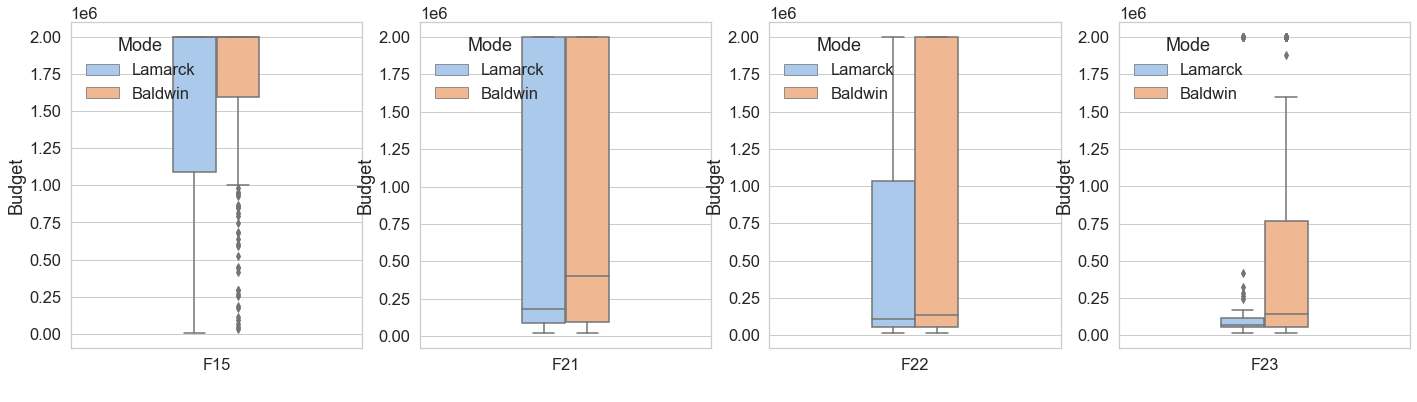

In [6]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="Budget")
dataframe["Budget"] = dataframe["Budget"].replace("NAN", 0)
dataframe["Budget"] = pd.to_numeric(dataframe["Budget"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in [15,21,22,23]]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    dist_cols = 4
    dist_rows = 1
    plt.figure(figsize=(6 * dist_cols, 6 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        ax= sns.boxplot(data=dataf, y="Budget",x="Function",hue="Mode",width=0.3)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1),frameon=False)
        plt.xlabel(" ")
        plt.ylabel("Budget")
        i = i + 1
    plt.savefig("./Budget_2.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)